# Lung Cancer Prediction

We are going to take the following approach:

1. Problem definition
2. Data
3. Evaluation
    - Lung Cancer Level severity According to Sex
    - Age vs. Lung Cancer severity level
    - Add all the contributing factors together vs. age and plot a scatter graph
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

> Given clinical parameters about a patient, we want to predict whethere or not they have Lung Cancer?


## 2. Data

The dataset acquired from Kaggle: https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link

## 3. Evaluation

Several plotlibs are introduced to hopefully better visualize the correlations of the values that leads to the levels of lung cancers with various types of graphs for initial evaluation before trying out different models of supervised learning.

## 4. Features

After speaking with the subject matter expert who put together the dataset who has medial knowledge in regards to the correlation of the factors listed in the dataset showned below:

Age: The age of the patient. (Numeric)
Gender: The gender of the patient. (Categorical)
Air Pollution: The level of air pollution exposure of the patient. (Categorical)
Alcohol use: The level of alcohol use of the patient. (Categorical)
Dust Allergy: The level of dust allergy of the patient. (Categorical)
OccuPational Hazards: The level of occupational hazards of the patient. (Categorical)
Genetic Risk: The level of genetic risk of the patient. (Categorical)
Chronic Lung Disease: The level of chronic lung disease of the patient. (Categorical)
Balanced Diet: The level of balanced diet of the patient. (Categorical)
Obesity: The level of obesity of the patient. (Categorical)
Smoking: The level of smoking of the patient. (Categorical)
Passive Smoker: The level of passive smoker of the patient. (Categorical)
Chest Pain: The level of chest pain of the patient. (Categorical)
Coughing of Blood: The level of coughing of blood of the patient. (Categorical)
Fatigue: The level of fatigue of the patient. (Categorical)
Weight Loss: The level of weight loss of the patient. (Categorical)
Shortness of Breath: The level of shortness of breath of the patient. (Categorical)
Wheezing: The level of wheezing of the patient. (Categorical)
Swallowing Difficulty: The level of swallowing difficulty of the patient. (Categorical)
Clubbing of Finger Nails: The level of clubbing of finger nails of the patient. (Categorical)

## 5. Modelling

We tried a handful of popular machine learning models to run initial train_test_split procedure like:
- LogisticRegression
- K-nearest Neighbours Classifier
- Random Forest Classifier
- Gradient Boosting Machines (GBM)
- XGBoost
- Support Vector Machines (SVM)
 
We have also tried to improve upon the models by tweaking the hyperparameter and parameter by hand and cross validate for higher accuracy by looking at the following:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* Receiver Operating Characteristic (ROC curve)
* Area Under the Curve (AUC)

## Preparing the tools
We are using pandas, Matplotlib and Numpy  for data analysis and monipulation

In [136]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

# we want our plots to appear inside the notebook
%matplotlib inline

# Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import LabelEncoder

In [51]:
df = pd.read_csv("Lung_cancer_dataset/cancer_patient_dataset.csv")
df.shape

(1000, 26)

In [52]:
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,2,2,2,4,2,3,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3,High


We need to first turning 'Level' column from str to int

In [53]:
# Define the mapping dictionary
mapping = {'Low': 0, 'Medium' : 1, 'High': 2}

# Use the map function to convert the strings to integers
df['Level'] = df['Level'].map(mapping)

# Verify the converted column
print(df['Level'])

0      0
1      1
2      2
3      2
4      2
      ..
995    2
996    2
997    2
998    2
999    2
Name: Level, Length: 1000, dtype: int64


In [54]:
# Verify the entire dataset w/ 'Level' turning into int
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4,0
1,1,P10,17,1,3,1,5,3,4,2,2,2,2,4,2,3,1,3,7,8,6,2,1,7,2,1
2,2,P100,35,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,2
3,3,P1000,37,1,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5,2
4,4,P101,46,1,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3,2


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [56]:
# Overview the 'Gender' column
df.Gender.value_counts()

1    598
2    402
Name: Gender, dtype: int64

In [57]:
# Check for missing value
df.isna().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [58]:
# Compare 'Level' column with 'Gender' column
pd.crosstab(df.Gender, df.Level)

Level,0,1,2
Gender,,,
1,149,197,252
2,154,135,113


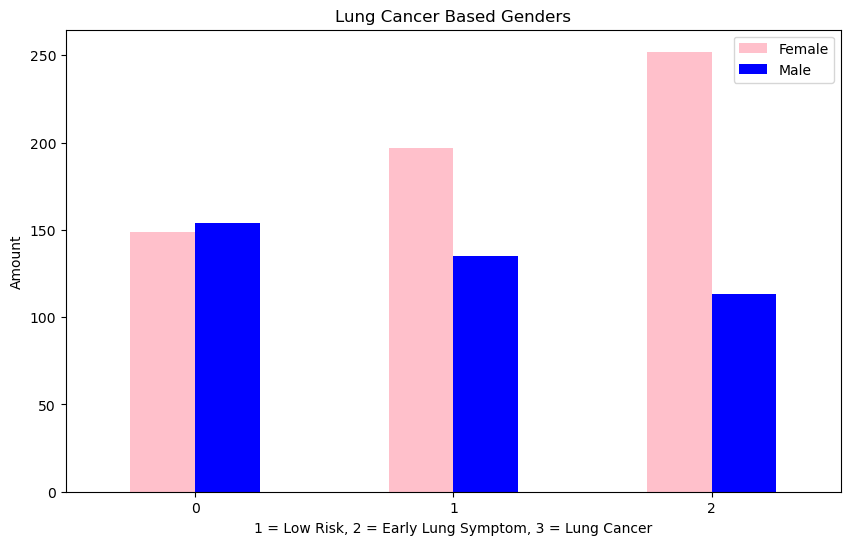

In [59]:
# Create a plot of crosstab
pd.crosstab(df.Level, df.Gender).plot(kind="bar",
                                     figsize=(10,6),
                                     color=("pink","blue"))

plt.title("Lung Cancer Based Genders")
plt.xlabel("1 = Low Risk, 2 = Early Lung Symptom, 3 = Lung Cancer")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);
plt.xticks(rotation=0); # Rotate the x label 

### Age vs. anount of peitients according to Lung cancer severity level

In [60]:
df.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,3.948000,4.195000,4.438000,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000,1.062000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,2.495902,2.311778,2.280209,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686,0.815365
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,1.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000,2.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,8.000000,8.000000,9.000000,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000,2.000000


In [61]:
# Set the display option to show all columns
pd.set_option('display.max_columns', None)

# Display the DataFrame with all columns
print(df)

     index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0        0         P1   33       1              2            4             5   
1        1        P10   17       1              3            1             5   
2        2       P100   35       1              4            5             6   
3        3      P1000   37       1              7            7             7   
4        4       P101   46       1              6            8             7   
..     ...        ...  ...     ...            ...          ...           ...   
995    995       P995   44       1              6            7             7   
996    996       P996   37       2              6            8             7   
997    997       P997   25       2              4            5             6   
998    998       P998   18       2              6            8             7   
999    999       P999   47       1              6            5             6   

     OccuPational Hazards  Genetic Risk

### We need to clean up the spaces contains in all the columns to make sure we can manipulated them down the road

In [62]:
# Remove spaces from all column labels
df.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)

# Display the updated dataframe
print(df)

     index Patient_Id  Age  Gender  Air_Pollution  Alcohol_use  Dust_Allergy  \
0        0         P1   33       1              2            4             5   
1        1        P10   17       1              3            1             5   
2        2       P100   35       1              4            5             6   
3        3      P1000   37       1              7            7             7   
4        4       P101   46       1              6            8             7   
..     ...        ...  ...     ...            ...          ...           ...   
995    995       P995   44       1              6            7             7   
996    996       P996   37       2              6            8             7   
997    997       P997   25       2              4            5             6   
998    998       P998   18       2              6            8             7   
999    999       P999   47       1              6            5             6   

     OccuPational_Hazards  Genetic_Risk

### So I tried to find correlations in scatter plot by using 'Smoking' and 'chronic_Lung_disease' columns as x&y to inidcate the data of 'Level'

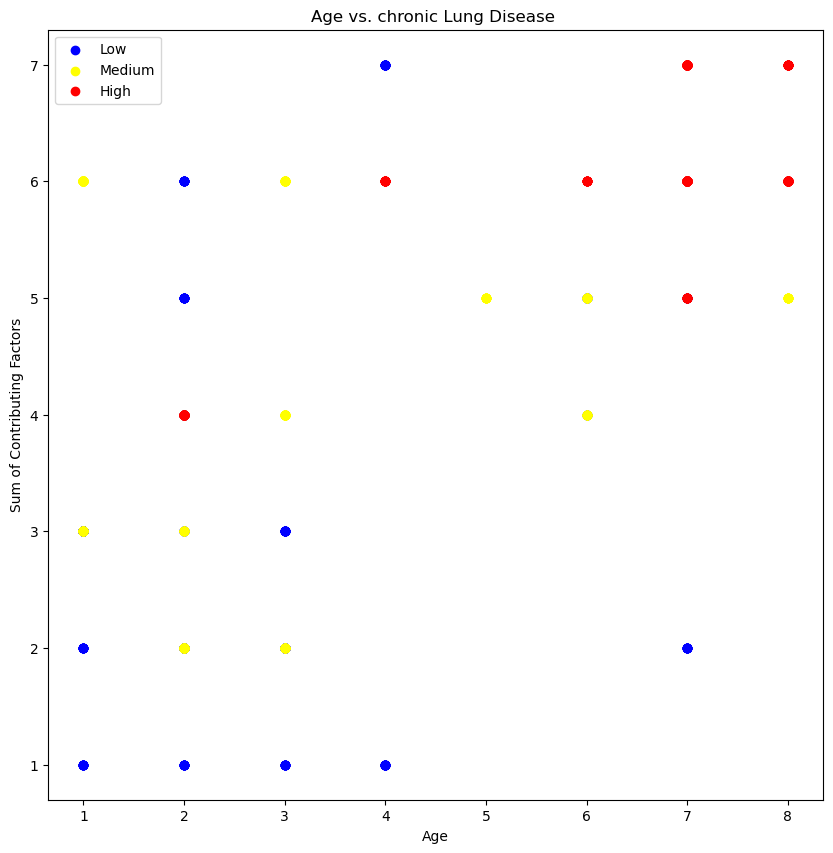

In [63]:
# Create another figure
plt.figure(figsize=(10,10))

# Rename the 'chronic Lung Disease' columns with spaces by replacing spaces with underscores
df.columns = df.columns.str.replace('chronic Lung Disease', 'chronic_Lung_Disease')

# Scatter with Low=1 examples
plt.scatter(df.Smoking[df.Level==0],
           df.chronic_Lung_Disease[df.Level==0],
           c="blue")

# Scatter with Medium=2 example
plt.scatter(df.Smoking[df.Level==1],
           df.chronic_Lung_Disease[df.Level==1],
           c="yellow")

# Scatter with High=3 example
plt.scatter(df.Smoking[df.Level==2],
           df.chronic_Lung_Disease[df.Level==2],
           c="red");

# Add some graph labels
plt.title("Age vs. chronic Lung Disease ")
plt.xlabel("Age")
plt.ylabel("Sum of Contributing Factors")
plt.legend(["Low", "Medium", "High"]);

In [64]:
# Lets Remove the 'Patient ID' column using the drop function
df = df.drop('Patient_Id', axis=1)

print(df)

     index  Age  Gender  Air_Pollution  Alcohol_use  Dust_Allergy  \
0        0   33       1              2            4             5   
1        1   17       1              3            1             5   
2        2   35       1              4            5             6   
3        3   37       1              7            7             7   
4        4   46       1              6            8             7   
..     ...  ...     ...            ...          ...           ...   
995    995   44       1              6            7             7   
996    996   37       2              6            8             7   
997    997   25       2              4            5             6   
998    998   18       2              6            8             7   
999    999   47       1              6            5             6   

     OccuPational_Hazards  Genetic_Risk  chronic_Lung_Disease  Balanced_Diet  \
0                       4             3                     2              2   
1          

In [65]:
# Lets Remove the 'Level' column using the drop function
# df = df.drop('Level', axis=1)

print(df)

     index  Age  Gender  Air_Pollution  Alcohol_use  Dust_Allergy  \
0        0   33       1              2            4             5   
1        1   17       1              3            1             5   
2        2   35       1              4            5             6   
3        3   37       1              7            7             7   
4        4   46       1              6            8             7   
..     ...  ...     ...            ...          ...           ...   
995    995   44       1              6            7             7   
996    996   37       2              6            8             7   
997    997   25       2              4            5             6   
998    998   18       2              6            8             7   
999    999   47       1              6            5             6   

     OccuPational_Hazards  Genetic_Risk  chronic_Lung_Disease  Balanced_Diet  \
0                       4             3                     2              2   
1          

In [66]:
df.shape

(1000, 25)

In [67]:
# Lets try to add the int values across columns from 'Air_Pollution' to 'Snoring' and make a new column called 'Sum_of_contributing_factors'
Sum_of_contributing_factors = df.iloc[:, 3:24].sum(axis=1)

# Add the 'Sum_of_contributing_factors' as a new column
df = df.assign(Sum_of_contributing_factors=Sum_of_contributing_factors)

# Print the sum
print(Sum_of_contributing_factors)

0       61
1       70
2      105
3      121
4      111
      ... 
995    122
996    125
997    105
998    111
999    107
Length: 1000, dtype: int64


In [68]:
print(df)

     index  Age  Gender  Air_Pollution  Alcohol_use  Dust_Allergy  \
0        0   33       1              2            4             5   
1        1   17       1              3            1             5   
2        2   35       1              4            5             6   
3        3   37       1              7            7             7   
4        4   46       1              6            8             7   
..     ...  ...     ...            ...          ...           ...   
995    995   44       1              6            7             7   
996    996   37       2              6            8             7   
997    997   25       2              4            5             6   
998    998   18       2              6            8             7   
999    999   47       1              6            5             6   

     OccuPational_Hazards  Genetic_Risk  chronic_Lung_Disease  Balanced_Diet  \
0                       4             3                     2              2   
1          

### After adding the new 'Sum_of_contributing_factors' column, we can try to plot scatter data with 'Age' column

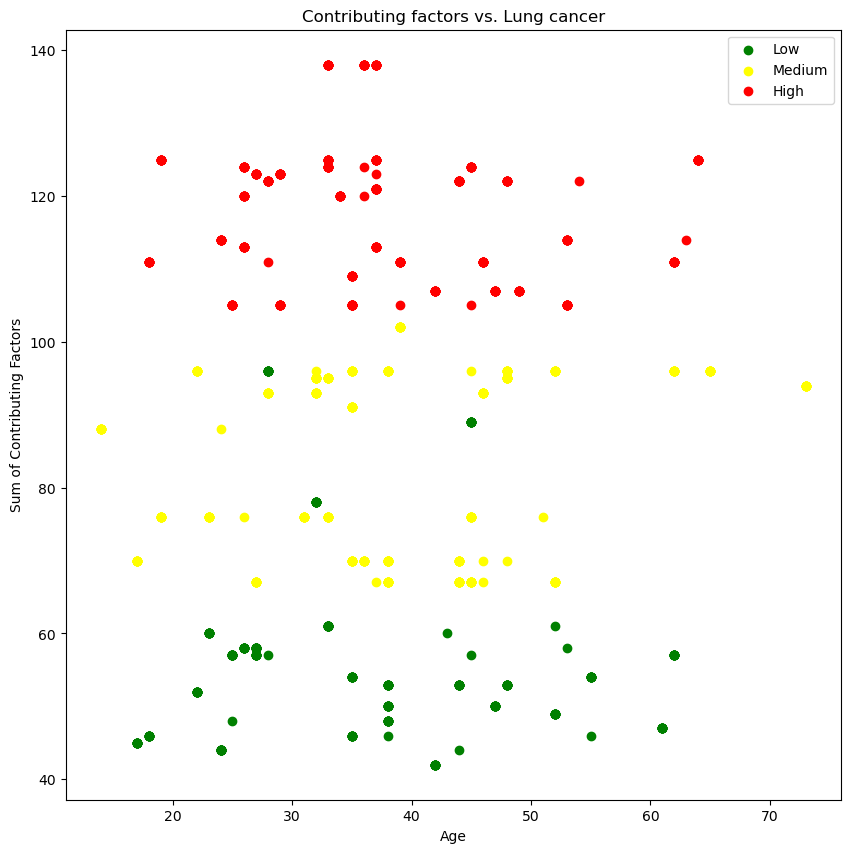

In [69]:
# Create another figure
plt.figure(figsize=(10,10))

# Scatter with Low=1 examples
plt.scatter(df.Age[df.Level==0],
           df.Sum_of_contributing_factors[df.Level==0],
           c="green")

# Scatter with Medium=2 example
plt.scatter(df.Age[df.Level==1],
           df.Sum_of_contributing_factors[df.Level==1],
           c="yellow")

# Scatter with High=3 example
plt.scatter(df.Age[df.Level==2],
           df.Sum_of_contributing_factors[df.Level==2],
           c="red");

# Add some graph labels
plt.title("Contributing factors vs. Lung cancer")
plt.xlabel("Age")
plt.ylabel("Sum of Contributing Factors")
plt.legend(["Low", "Medium", "High"]);

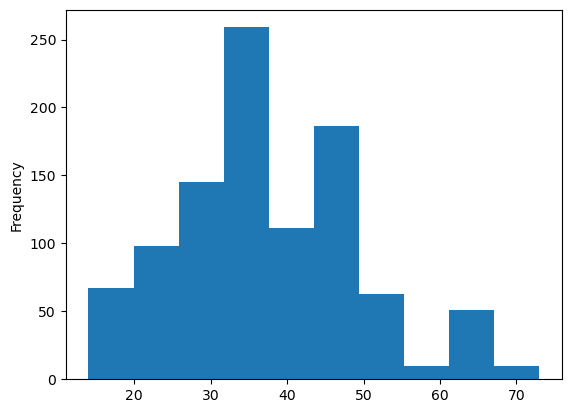

In [70]:
# Check the distribution of the 'Age' column with a histogram
df.Age.plot.hist();

In [71]:
# Make a correlation matrix
df.corr()

,index,Age,Gender,Air_Pollution,Alcohol_use,Dust_Allergy,OccuPational_Hazards,Genetic_Risk,chronic_Lung_Disease,Balanced_Diet,Obesity,Smoking,Passive_Smoker,Chest_Pain,Coughing_of_Blood,Fatigue,Weight_Loss,Shortness_of_Breath,Wheezing,Swallowing_Difficulty,Clubbing_of_Finger_Nails,Frequent_Cold,Dry_Cough,Snoring,Level,Sum_of_contributing_factors
index,1.000000,0.002674,-0.025739,0.053307,0.041374,0.037960,0.032355,0.030725,0.025177,0.030743,0.050584,0.018407,0.019517,0.022210,0.049401,0.042346,0.026393,0.027950,0.015078,0.005573,0.015706,0.045687,0.003793,-0.002957,0.057758,0.046682
Age,0.002674,1.000000,-0.202086,0.099494,0.151742,0.035202,0.062177,0.073151,0.128952,0.004863,0.034337,0.075333,0.004908,0.012864,0.053006,0.095059,0.106946,0.035329,-0.095354,-0.105833,0.039258,-0.012706,0.012128,-0.004700,0.060048,0.065709
Gender,-0.025739,-0.202086,1.000000,-0.246912,-0.227636,-0.204312,-0.192343,-0.222727,-0.205061,-0.099741,-0.123813,-0.206924,-0.184826,-0.218426,-0.146505,-0.116467,-0.057993,-0.045972,-0.076304,-0.058324,-0.034219,-0.000526,-0.123001,-0.181618,-0.164985,-0.231918
Air_Pollution,0.053307,0.099494,-0.246912,1.000000,0.747293,0.637503,0.608924,0.705276,0.626701,0.524873,0.601468,0.481902,0.606764,0.585734,0.607829,0.211724,0.258016,0.269558,0.055368,-0.080918,0.241065,0.174539,0.261489,-0.021343,0.636038,0.722545
Alcohol_use,0.041374,0.151742,-0.227636,0.747293,1.000000,0.818644,0.878786,0.877210,0.763576,0.653352,0.669312,0.547035,0.592576,0.717242,0.667612,0.237245,0.207851,0.435785,0.180817,-0.114073,0.414992,0.180778,0.211277,0.122694,0.718710,0.857429
Dust_Allergy,0.037960,0.035202,-0.204312,0.637503,0.818644,1.000000,0.835860,0.787904,0.619556,0.647197,0.700676,0.358691,0.560002,0.639983,0.625291,0.332472,0.321756,0.518682,0.304850,0.031141,0.345714,0.219389,0.300195,0.052844,0.713839,0.841700
OccuPational_Hazards,0.032355,0.062177,-0.192343,0.608924,0.878786,0.835860,1.000000,0.893049,0.858284,0.691509,0.722191,0.497693,0.555311,0.775619,0.645947,0.267844,0.176226,0.366482,0.178925,-0.002853,0.366447,0.077166,0.159887,0.022916,0.673255,0.839228
Genetic_Risk,0.030725,0.073151,-0.222727,0.705276,0.877210,0.787904,0.893049,1.000000,0.836231,0.679905,0.729826,0.543259,0.609071,0.831751,0.632236,0.230530,0.271743,0.458200,0.204973,-0.062948,0.357815,0.087092,0.194399,-0.056831,0.701303,0.860390
chronic_Lung_Disease,0.025177,0.128952,-0.205061,0.626701,0.763576,0.619556,0.858284,0.836231,1.000000,0.622632,0.601754,0.578585,0.572698,0.782646,0.602987,0.247697,0.104080,0.182426,0.057214,0.007279,0.298023,0.028759,0.114161,0.043375,0.609971,0.757322
Balanced_Diet,0.030743,0.004863,-0.099741,0.524873,0.653352,0.647197,0.691509,0.679905,0.622632,1.000000,0.706922,0.645390,0.725123,0.798207,0.745054,0.400678,-0.006544,0.343623,0.063930,0.046807,0.041967,0.263931,0.331995,0.152677,0.706273,0.797154


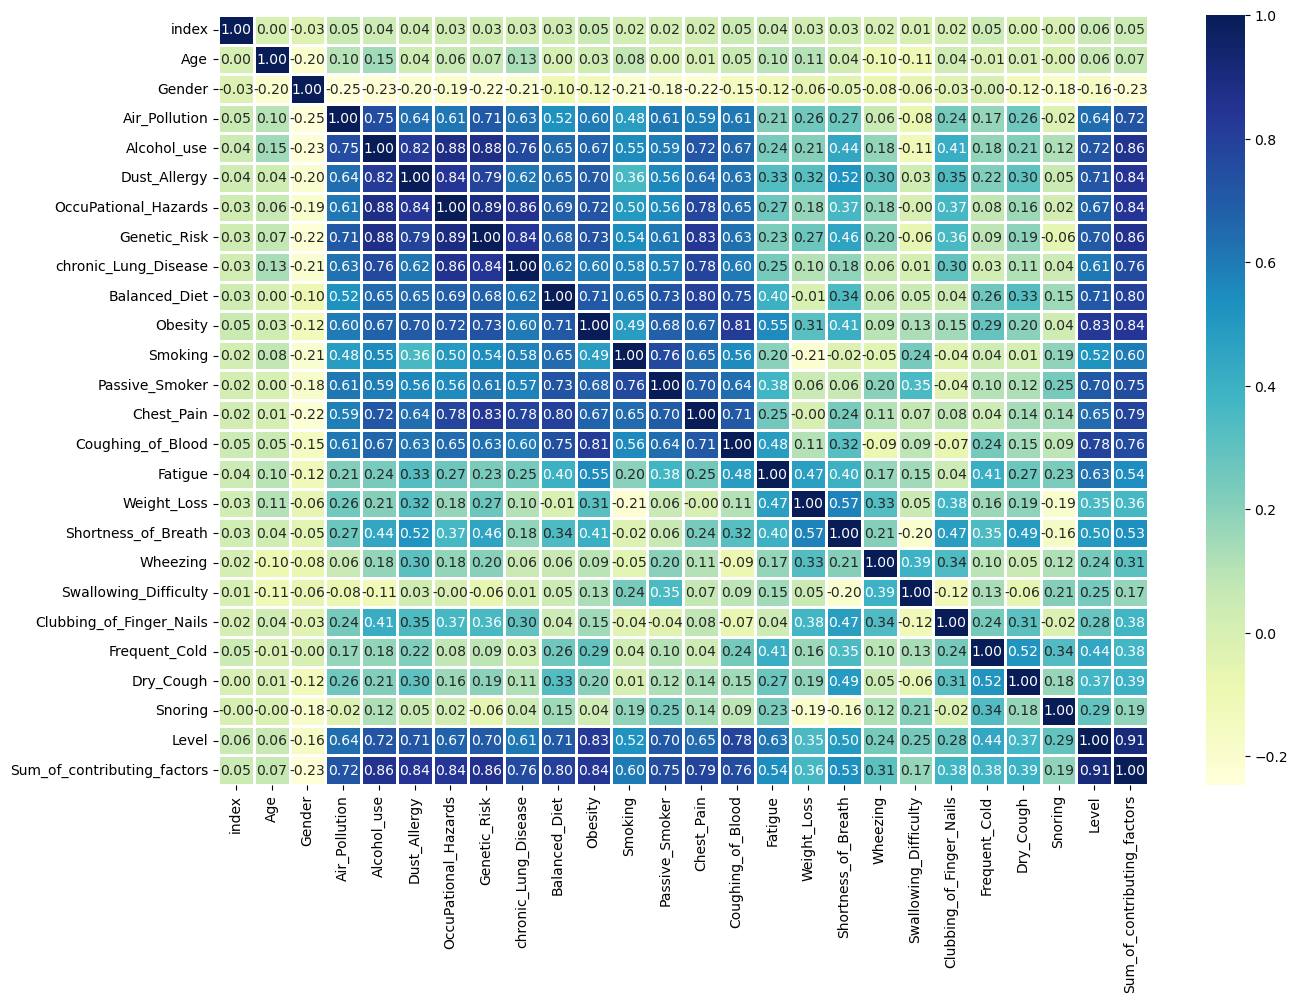

In [72]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=1,
                fmt=".2f",
                cmap="YlGnBu");
bottom, top = ax.get_ylim()

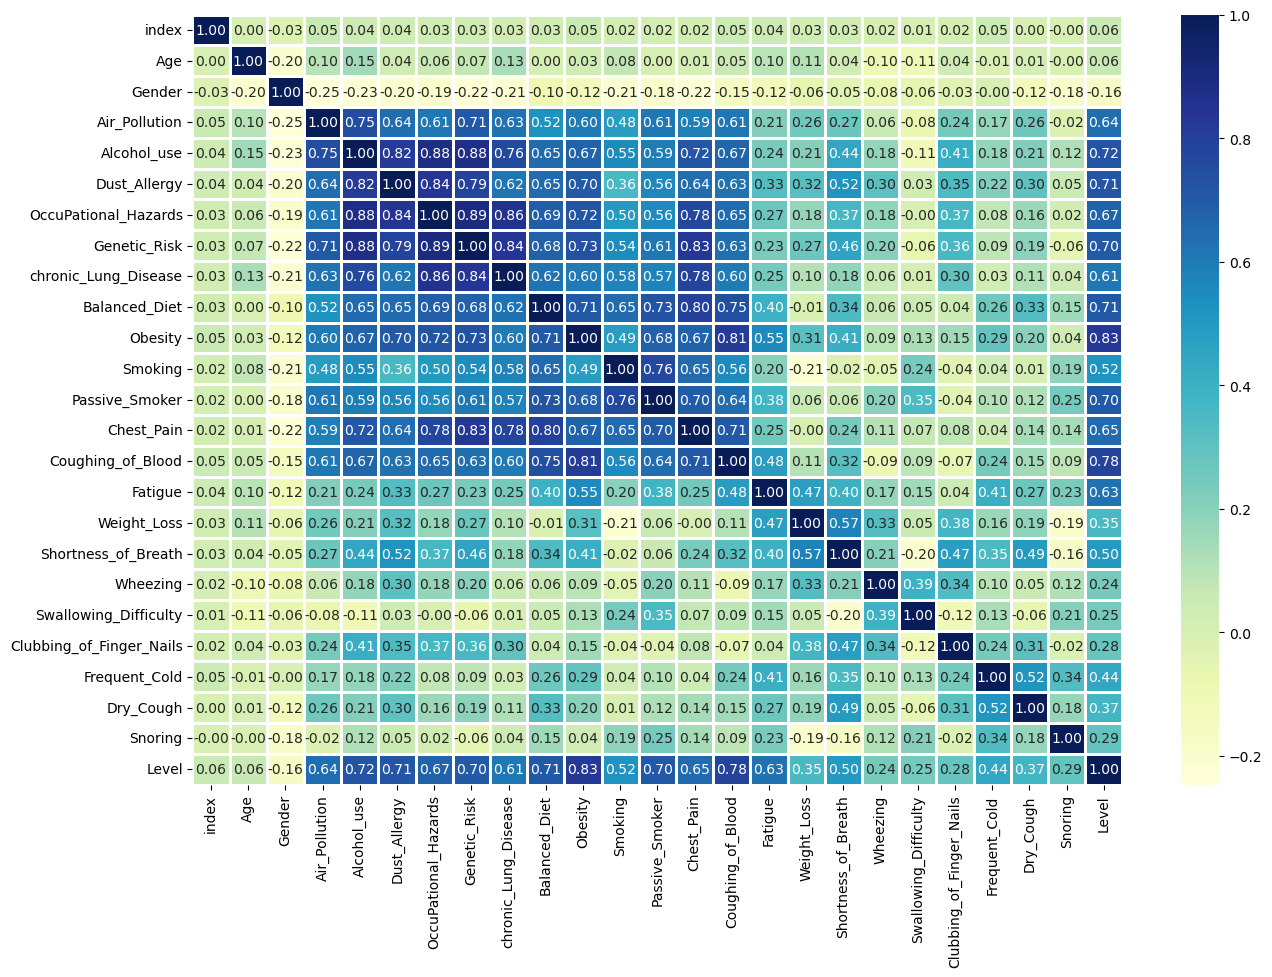

In [73]:
# Lets Remove the 'Sum_of_contributing_factors' column using the drop function
df = df.drop('Sum_of_contributing_factors', axis=1)

# Let's make our NEW correlation matrix with original dataset
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=1,
                fmt=".2f",
                cmap="YlGnBu");
bottom, top = ax.get_ylim()

## Start Modelling

In [76]:
# Split data into x and y
x =df.drop('Level', axis=1)
y =df['Level']

x

,index,Age,Gender,Air_Pollution,Alcohol_use,Dust_Allergy,OccuPational_Hazards,Genetic_Risk,chronic_Lung_Disease,Balanced_Diet,Obesity,Smoking,Passive_Smoker,Chest_Pain,Coughing_of_Blood,Fatigue,Weight_Loss,Shortness_of_Breath,Wheezing,Swallowing_Difficulty,Clubbing_of_Finger_Nails,Frequent_Cold,Dry_Cough,Snoring
0,0,33,1,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4
1,1,17,1,3,1,5,3,4,2,2,2,2,4,2,3,1,3,7,8,6,2,1,7,2
2,2,35,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2
3,3,37,1,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5
4,4,46,1,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,44,1,6,7,7,7,7,6,7,7,7,8,7,7,5,3,2,7,8,2,4,5,3
996,996,37,2,6,8,7,7,7,6,7,7,7,8,7,7,9,6,5,7,2,4,3,1,4
997,997,25,2,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2
998,998,18,2,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3


In [77]:
y

0      0
1      1
2      2
3      2
4      2
      ..
995    2
996    2
997    2
998    2
999    2
Name: Level, Length: 1000, dtype: int64

In [78]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
x_train, x_test, y_train, y_test= train_test_split(x,
                                                  y,
                                                  test_size=0.9)


In [79]:
x_train

,index,Age,Gender,Air_Pollution,Alcohol_use,Dust_Allergy,OccuPational_Hazards,Genetic_Risk,chronic_Lung_Disease,Balanced_Diet,Obesity,Smoking,Passive_Smoker,Chest_Pain,Coughing_of_Blood,Fatigue,Weight_Loss,Shortness_of_Breath,Wheezing,Swallowing_Difficulty,Clubbing_of_Finger_Nails,Frequent_Cold,Dry_Cough,Snoring
815,815,32,1,2,3,6,7,7,7,7,2,4,3,7,4,2,1,3,2,2,1,2,5,1
862,862,38,2,1,2,3,4,2,4,3,3,3,2,3,4,4,1,2,4,6,5,4,2,5
269,269,35,1,1,3,2,4,2,6,2,2,2,1,3,4,4,2,2,2,3,2,1,2,4
201,201,27,2,3,1,4,2,3,2,3,3,2,2,4,2,2,2,3,4,1,5,2,6,2
161,161,18,2,3,2,1,3,2,1,3,2,1,2,2,2,2,2,1,3,4,4,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,106,33,1,6,7,7,7,7,7,6,7,7,7,7,7,8,5,7,6,7,8,7,6,2
270,270,24,2,1,2,2,3,2,4,2,3,2,1,1,1,1,1,1,2,3,4,5,2,1
860,860,36,2,2,1,5,3,2,3,2,4,1,4,2,4,6,7,2,5,8,1,3,2,3
435,435,49,1,6,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2


In [80]:
y_train, len(y_train)

(815    0
 862    1
 269    0
 201    0
 161    0
       ..
 106    2
 270    0
 860    1
 435    2
 102    2
 Name: Level, Length: 100, dtype: int64,
 100)

### Selecting the Machine Learning Models

Now we have got data split into training and test set, it's time to build a machine leaning model.

We weill train it (find the patterns) on the trainingset.

And we will test it (use the patterns) on the test set.

We are going to try 3 different machine learning models:
1. Logistic Regression
2. K-nearest Neighbours Classifier
3. Random Forest Classifier
4. Gradient Boosting Machines (GBM)
5. XGBoost
6. Support Vector Machines (SVM)

In [81]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier(),
         "GBM": GradientBoostingClassifier(),
         "XGBoost": xgb.XGBClassifier(),
         "SVM": SVC()}

# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    x_train : training data (no labels)
    x_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
#     Set random seed
    np.random.seed(42)
# Make a dictionary to keep model scores
    model_scores = {}
# Loop through models
    for name, model in models.items():
#     Fit the model to the data
        model.fit(x_train, y_train)
# Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [82]:
# We need to drop the 'Patient_Id' because it is a str and Index can replace as Id
# df = df.drop('Patient_Id', axis=1)
# df = df.drop('Sum_of_contributing_factors', axis=1)
df = df.drop('index', axis=1)
print(df)

     Age  Gender  Air_Pollution  Alcohol_use  Dust_Allergy  \
0     33       1              2            4             5   
1     17       1              3            1             5   
2     35       1              4            5             6   
3     37       1              7            7             7   
4     46       1              6            8             7   
..   ...     ...            ...          ...           ...   
995   44       1              6            7             7   
996   37       2              6            8             7   
997   25       2              4            5             6   
998   18       2              6            8             7   
999   47       1              6            5             6   

     OccuPational_Hazards  Genetic_Risk  chronic_Lung_Disease  Balanced_Diet  \
0                       4             3                     2              2   
1                       3             4                     2              2   
2              

In [83]:
model_scores = fit_and_score(models=models,
                            x_train=x_train,
                            x_test=x_test,
                            y_train=y_train,
                            y_test=y_test
                           )
print(model_scores);

/Users/peter/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8077777777777778, 'KNN': 0.5144444444444445, 'Random Forest': 0.9888888888888889, 'GBM': 0.9888888888888889, 'XGBoost': 0.9888888888888889, 'SVM': 0.3566666666666667}


## Model Comparison

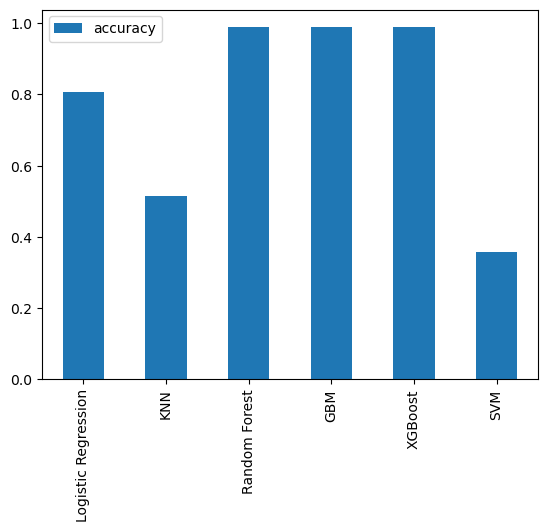

In [84]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Let's look at the following:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* Receiver Operating Characteristic (ROC curve)
* Area Under the Curve (AUC)

## Hyperparameter (By hand)

We will start off with:

* Hyperparameter Tuning
* Cross-Validation

In [85]:
# Let's tune KNN
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(x_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(x_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(x_test, y_test))

In [86]:
train_scores

[1.0,
 0.88,
 0.78,
 0.77,
 0.7,
 0.65,
 0.63,
 0.62,
 0.62,
 0.54,
 0.4,
 0.38,
 0.38,
 0.39,
 0.35,
 0.35,
 0.33,
 0.35,
 0.39,
 0.44]

In [87]:
test_scores

[0.6477777777777778,
 0.59,
 0.59,
 0.5555555555555556,
 0.5144444444444445,
 0.4866666666666667,
 0.4677777777777778,
 0.4666666666666667,
 0.44,
 0.37,
 0.29777777777777775,
 0.2777777777777778,
 0.24444444444444444,
 0.24555555555555555,
 0.23555555555555555,
 0.25555555555555554,
 0.24,
 0.24555555555555555,
 0.28888888888888886,
 0.31]

Maximum KNN score on the test data: 64.78%


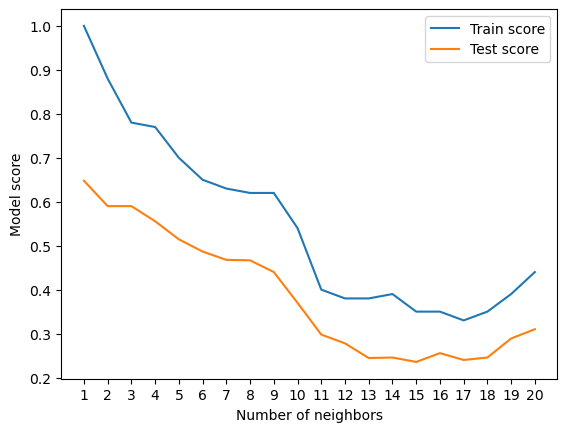

In [88]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning w/ RandomizedSearchCV

We are going to tune the following models by hand using RandomizedSearchCV (seem pretty low compare to other models):

* LogisticRegression()
* Support Vector Machines (SVM)

In [89]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
               "solver": ["liblinear"]}

# Create a hyperparameter grid for Support Vector Machines
svm_grid = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf"],
    "gamma": ["scale", "auto"]}

### Now we have got hyperparameter grids setup for each of our models, let's tune the damn thing using RandomizedSearchCV

In [90]:
# Tune LogisticRegression
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit random hyperparameter search model for LogsiticRegression
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [91]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 29.763514416313132}

In [92]:
rs_log_reg.score(x_test, y_test)

0.9488888888888889

### Now we have tuned LogisticRegression(), let's do the same for Support Vector Machine(SVM)

In [93]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for SVM
rs_svm = RandomizedSearchCV(SVC(),
                            param_distributions=svm_grid,
                            cv=5,
                            n_iter=12,
                            verbose=True)

# Fit random hyperparameter search model for SVM
rs_svm.fit(x_train, y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=12,
                   param_distributions={'C': [0.1, 1, 10],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'rbf']},
                   verbose=True)

In [94]:
# Find the best hyperparameters
rs_svm.best_params_

{'kernel': 'linear', 'gamma': 'scale', 'C': 0.1}

In [95]:
# Evaluate the randomized search for Support Vector Machine (SVM) model
rs_svm.score(x_test, y_test)

0.9888888888888889

In [96]:
model_scores

{'Logistic Regression': 0.8077777777777778,
 'KNN': 0.5144444444444445,
 'Random Forest': 0.9888888888888889,
 'GBM': 0.9888888888888889,
 'XGBoost': 0.9888888888888889,
 'SVM': 0.3566666666666667}

### Logistic Regression was .89, now scores at .98

## Hyperparameter Tuning w/ GridSearchCV

Since our LogisticRegression model provides better result, we will try and improve them again using GridSearchCV

In [97]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
               "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisicRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [98]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 17.433288221999874, 'solver': 'liblinear'}

In [99]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(x_test,y_test)

0.9466666666666667

In [100]:
model_scores

{'Logistic Regression': 0.8077777777777778,
 'KNN': 0.5144444444444445,
 'Random Forest': 0.9888888888888889,
 'GBM': 0.9888888888888889,
 'XGBoost': 0.9888888888888889,
 'SVM': 0.3566666666666667}

### Logistic Regression was .72, now scores at .93

## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

...and it would be great if cross-validation was used where possible

To make comparisons and evaluate our trained model, first we need to make predictions.

In [101]:
# Make prediction with tuned model
y_preds = gs_log_reg.predict(x_test)

In [102]:
y_preds

array([1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 1,
       0, 1, 2, 0, 1, 2, 0, 0, 0, 2, 1, 0, 2, 2, 2, 1, 2, 0, 2, 2, 0, 1,
       1, 0, 0, 1, 2, 0, 1, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 0, 2, 2, 0, 1,
       2, 1, 1, 2, 2, 0, 1, 1, 1, 1, 2, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 0,
       2, 2, 0, 0, 1, 2, 2, 2, 2, 2, 1, 0, 0, 2, 0, 0, 1, 1, 2, 1, 1, 1,
       1, 2, 2, 0, 1, 2, 1, 2, 1, 1, 2, 2, 0, 0, 1, 2, 2, 2, 2, 2, 0, 1,
       0, 2, 1, 0, 1, 2, 1, 1, 0, 1, 0, 0, 2, 1, 0, 2, 0, 2, 2, 0, 0, 2,
       0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 0, 2,
       1, 2, 1, 2, 0, 2, 0, 1, 2, 1, 2, 1, 0, 1, 0, 0, 1, 2, 2, 1, 2, 2,
       0, 1, 1, 2, 1, 1, 0, 0, 0, 2, 0, 0, 1, 2, 2, 0, 2, 2, 2, 1, 1, 0,
       1, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 1, 1, 1, 2, 2, 2,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 0, 1, 0, 1, 2, 0, 2, 1, 2, 2, 0,
       0, 2, 2, 0, 1, 0, 1, 0, 1, 2, 1, 1, 1, 0, 1, 0, 1, 2, 2, 0, 2, 0,
       1, 2, 2, 0, 0, 1, 1, 2, 1, 0, 0, 2, 0, 0, 2,

In [103]:
y_test

521    1
737    1
740    1
660    2
411    1
      ..
251    1
726    0
461    2
455    2
996    2
Name: Level, Length: 900, dtype: int64

In [104]:
# Plot ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg, x_test, y_test)

ValueError: Expected 'estimator' to be a binary classifier, but got GridSearchCV fit on multiclass (3 classes) data

#### Seems like ROC and AUC only works for binary classifier, which does not apply to the 'Level' of 3 classes

### Lets give Confusion matrix a try...

In [105]:
print(confusion_matrix(y_test, y_preds))

[[241  15  14]
 [  3 298   8]
 [  0   8 313]]


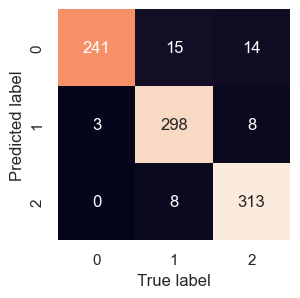

In [106]:
sns.set(font_scale=1)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax=plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False,
                    fmt='d')  # Set fmt='d' to display numbers as integers)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(y_test, y_preds)

##### Bam! ROC & AUC, Confusion matrix done and done babi~

In [107]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94       270
           1       0.93      0.96      0.95       309
           2       0.93      0.98      0.95       321

    accuracy                           0.95       900
   macro avg       0.95      0.94      0.95       900
weighted avg       0.95      0.95      0.95       900



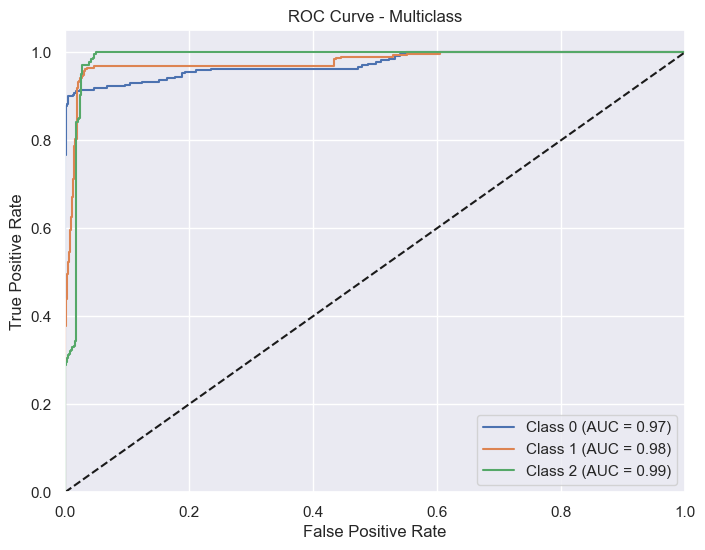

In [108]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

# Get predicted probabilities for each class
y_probs = gs_log_reg.predict_proba(x_test)

# Binarize the true labels
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = y_test_binarized.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], "k--")  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Multiclass")
plt.legend(loc="lower right")
plt.show()

##### The hell just happened? too overfitted buddy!! Judge and the jury situation

### Calculate evaluation metrics using cross-validation

We are going to calculate precision, recall and f1-score of our model using cross-validation and to do so we will be using `cross_val_score()`

In [109]:
# Check best hyperparameter
gs_log_reg.best_params_

{'C': 17.433288221999874, 'solver': 'liblinear'}

In [110]:
from sklearn.metrics import precision_score, make_scorer

# Create an instance of the classifier model
clf = SVC()

# Define the scoring metric with 'micro' average
scoring = make_scorer(precision_score, average='micro')

# Calculate cross-validated precision
cv_precision = cross_val_score(clf, x, y, cv=5, scoring=scoring)
cv_precision = np.mean(cv_precision)

print("Cross-validated precision:", cv_precision)

Cross-validated precision: 0.353


In [111]:
cv_f1 = cross_val_score(clf, x, y, cv=5, scoring="f1_macro")
cv_f1 = np.mean(cv_f1)

print("Cross-validated f1-score:", cv_f1)

Cross-validated f1-score: 0.1737751392923807


##### Try different CV tuning approach

In [112]:
# Check best hyperparameter
gs_log_reg.best_params_

{'C': 17.433288221999874, 'solver': 'liblinear'}

In [113]:
# Create a new classificatier with best parameters
clf=LogisticRegression(C=417.53189365604004,
                      solver="liblinear")

# Cross-validated accuracy
cv_acc=cross_val_score(clf,
                      x,
                      y,
                      cv=5,
                      scoring="accuracy")
cv_acc

array([1.   , 1.   , 0.995, 1.   , 0.995])

In [114]:
cv_acc = np.mean(cv_acc)
cv_acc

0.998

In [115]:
# Cross-validated precision
cv_precision=cross_val_score(clf,
                      x,
                      y,
                      cv=5,
                      scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

/Users/peter/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/peter/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/Users/peter/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/peter/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1954, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/peter/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1573, in precision_recall_

nan

In [116]:
# Cross-validation recall
cv_recall=cross_val_score(clf,
                      x,
                      y,
                      cv=5,
                      scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

/Users/peter/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/peter/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/Users/peter/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/peter/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 2098, in recall_score
    _, r, _, _ = precision_recall_fscore_support(
  File "/Users/peter/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1573, in precision_recall_fsc

nan

In [117]:
# Cross-validated fi-score
cv_f1=cross_val_score(clf,
                      x,
                      y,
                      cv=5,
                      scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

/Users/peter/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/peter/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/Users/peter/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/peter/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/peter/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precision_recall_fsco

nan

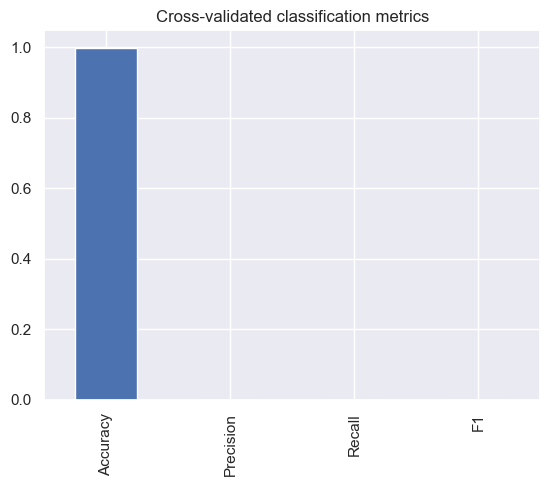

In [118]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_precision,
                          "Recall": cv_recall,
                          "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                     legend=False);

## Feature Importance

Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine laerning model. One way ti find featyre importance is to search fro "(MODEL NAME) featureimportance".

Let's find the feature importance for our LogisticRegression model...

In [119]:
gs_log_reg.best_params_

{'C': 17.433288221999874, 'solver': 'liblinear'}

In [120]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                        solver="liblinear")

clf.fit(x_train, y_train);

# Check coef_
clf.coef_

array([[ 0.00213969,  0.05657907,  0.68997952,  0.08688254, -0.37044193,
        -0.08373333,  0.13970423, -0.19493731,  0.14557347, -0.16040504,
        -0.12034642,  0.11618143, -0.14595068,  0.03162658, -0.26642616,
        -0.57465935,  0.40300674, -0.42552559, -0.11761286, -0.05793638,
        -0.41372354,  0.03700839,  0.48282038, -0.03611391],
       [-0.0013076 ,  0.05024266, -0.43058288, -0.46557007, -0.05891925,
         0.38367029,  0.10096289,  0.22758171, -0.19667219, -0.09519027,
         0.1136462 , -0.27082063, -0.14053731, -0.12483552, -0.12191949,
        -0.10702194, -0.34759268,  0.29230611,  0.18711149, -0.02920522,
         0.2936853 , -0.19253141, -0.35871366,  0.36432985],
       [-0.00207573, -0.15504479, -0.41526276,  0.39616697,  0.67876588,
        -0.29075783, -0.33109771, -0.01297328,  0.03616794,  0.23614104,
        -0.09066621,  0.25724785,  0.41924161, -0.03558177,  0.30242605,
         0.54973744,  0.21046588,  0.15572151, -0.20485013,  0.00163515,
  

In [121]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'Age': 0.0021396862967361396,
 'Gender': 0.0565790705975773,
 'Air_Pollution': 0.6899795198879158,
 'Alcohol_use': 0.08688254115741757,
 'Dust_Allergy': -0.37044193481692783,
 'OccuPational_Hazards': -0.0837333291942148,
 'Genetic_Risk': 0.13970422696120982,
 'chronic_Lung_Disease': -0.1949373119492306,
 'Balanced_Diet': 0.14557346983096695,
 'Obesity': -0.1604050363329109,
 'Smoking': -0.12034642046254684,
 'Passive_Smoker': 0.11618142957689127,
 'Chest_Pain': -0.14595068157877245,
 'Coughing_of_Blood': 0.03162657550348528,
 'Fatigue': -0.26642615906739175,
 'Weight_Loss': -0.5746593525976046,
 'Shortness_of_Breath': 0.4030067356651163,
 'Wheezing': -0.4255255854944221,
 'Swallowing_Difficulty': -0.11761286052315405,
 'Clubbing_of_Finger_Nails': -0.057936379108995545,
 'Frequent_Cold': -0.4137235429481292,
 'Dry_Cough': 0.03700839256170888,
 'Snoring': 0.48282037577314857,
 'Level': -0.036113912520320535}

In [122]:
x_test

,index,Age,Gender,Air_Pollution,Alcohol_use,Dust_Allergy,OccuPational_Hazards,Genetic_Risk,chronic_Lung_Disease,Balanced_Diet,Obesity,Smoking,Passive_Smoker,Chest_Pain,Coughing_of_Blood,Fatigue,Weight_Loss,Shortness_of_Breath,Wheezing,Swallowing_Difficulty,Clubbing_of_Finger_Nails,Frequent_Cold,Dry_Cough,Snoring
521,521,48,2,1,6,7,8,7,6,7,7,3,4,8,7,3,2,6,4,2,3,1,2,1
737,737,62,1,6,8,7,7,7,6,2,4,1,2,4,3,2,7,6,5,1,9,3,4,2
740,740,22,1,6,8,7,7,7,6,2,4,1,2,4,3,2,7,6,5,1,9,3,4,2
660,660,37,2,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5
411,411,46,2,1,6,7,5,3,2,6,2,3,3,2,2,3,3,7,7,4,8,7,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,251,28,2,1,6,7,5,3,2,6,2,3,3,2,2,3,3,7,7,4,8,7,7,5
726,726,62,1,3,2,1,3,2,4,5,1,6,2,3,2,4,3,2,1,2,4,2,3,2
461,461,34,1,6,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5
455,455,64,1,6,8,7,7,7,6,7,7,7,8,7,7,9,6,5,7,2,4,3,1,4


In [123]:
x_train

,index,Age,Gender,Air_Pollution,Alcohol_use,Dust_Allergy,OccuPational_Hazards,Genetic_Risk,chronic_Lung_Disease,Balanced_Diet,Obesity,Smoking,Passive_Smoker,Chest_Pain,Coughing_of_Blood,Fatigue,Weight_Loss,Shortness_of_Breath,Wheezing,Swallowing_Difficulty,Clubbing_of_Finger_Nails,Frequent_Cold,Dry_Cough,Snoring
815,815,32,1,2,3,6,7,7,7,7,2,4,3,7,4,2,1,3,2,2,1,2,5,1
862,862,38,2,1,2,3,4,2,4,3,3,3,2,3,4,4,1,2,4,6,5,4,2,5
269,269,35,1,1,3,2,4,2,6,2,2,2,1,3,4,4,2,2,2,3,2,1,2,4
201,201,27,2,3,1,4,2,3,2,3,3,2,2,4,2,2,2,3,4,1,5,2,6,2
161,161,18,2,3,2,1,3,2,1,3,2,1,2,2,2,2,2,1,3,4,4,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,106,33,1,6,7,7,7,7,7,6,7,7,7,7,7,8,5,7,6,7,8,7,6,2
270,270,24,2,1,2,2,3,2,4,2,3,2,1,1,1,1,1,1,2,3,4,5,2,1
860,860,36,2,2,1,5,3,2,3,2,4,1,4,2,4,6,7,2,5,8,1,3,2,3
435,435,49,1,6,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2


In [126]:
# Visualize feature importance
# feature_df=pd.DataFrame(feature_dict, index=[0])
# Drop the label you want to remove
label_to_drop = 'label_name'
feature_df.drop(label_to_drop, axis=1, inplace=True)feature_df.T.plot.bar(title="Feature Importance", legend=False);

SyntaxError: invalid syntax (1996483813.py, line 5)

In [124]:
# Drop the label you want to remove
label_to_drop = 'Level'
feature_df.drop(label_to_drop, axis=1, inplace=True)

# Visualize feature importance without level
feature_df=pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False)


NameError: name 'feature_df' is not defined

In [125]:
pd.crosstab(df["Gender"], df["Level"]),pd.crosstab(df["Air_Pollution"], df["Level"]),pd.crosstab(df["OccuPational_Hazards"], df["Level"]),pd.crosstab(df["chronic_Lung_Disease"], df["Level"]),pd.crosstab(df["Smoking"], df["Level"]), pd.crosstab(df["Coughing_of_Blood"], df["Level"]),pd.crosstab(df["Dry_Cough"], df["Level"])

(Level     0    1    2
 Gender               
 1       149  197  252
 2       154  135  113,
 Level            0    1    2
 Air_Pollution               
 1               40  101    0
 2              111   70   20
 3              112   61    0
 4               20   20   50
 5               10   10    0
 6               10   70  246
 7                0    0   30
 8                0    0   19,
 Level                  0   1    2
 OccuPational_Hazards             
 1                     50   0    0
 2                     71  61    0
 3                     81  60   10
 4                     71  41    0
 5                     10  50   70
 6                      0  20   10
 7                     20  70  275
 8                      0  30    0,
 Level                  0    1    2
 chronic_Lung_Disease              
 1                     50    0    0
 2                     82   91    0
 3                     81   60    0
 4                     20   51   70
 5                     40   30   10
 6 

## Let's try catboost and xgboost (Suggested by a good friend of mine)

In [127]:
!pip install cmake

In [128]:
pip install catboost

  Using cached catboost-1.2.tar.gz (95.9 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached plotly-5.14.1-py2.py3-none-any.whl (15.3 MB)
  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
  Using cached tenacity-8.2.2-py3-none-any.whl (24 kB)
  error: subprocess-exited-with-error
  
  × Building wheel for catboost (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [97 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.macosx-10.9-x86_64-cpython-310
      creating build/lib.macosx-10.9-x86_64-cpython-310/catboost
      copying catboost/monoforest.py -> build/lib.macosx-10.9-x86_64-cpython-310/catboost
      copying catboost/plot_helpers.py -> build/lib.macosx-10.9-x86_64-cpython-310/catboost
      copying catboost/metrics.py -> build/lib.macosx-10.9-x86_64-cpython-310/catboost
      cop

Note: you may need to restart the kernel to use updated packages.


In [130]:
pip install --upgrade setuptools wheel

  Using cached setuptools-67.8.0-py3-none-any.whl (1.1 MB)
  Using cached wheel-0.40.0-py3-none-any.whl (64 kB)
  Attempting uninstall: wheel
    Found existing installation: wheel 0.37.1
    Uninstalling wheel-0.37.1:
      Successfully uninstalled wheel-0.37.1
  Attempting uninstall: setuptools
    Found existing installation: setuptools 65.6.3
    Uninstalling setuptools-65.6.3:
      Successfully uninstalled setuptools-65.6.3
Note: you may need to restart the kernel to use updated packages.


In [132]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [133]:
pip install catboost

  Using cached catboost-1.2.tar.gz (95.9 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
  Using cached plotly-5.14.1-py2.py3-none-any.whl (15.3 MB)
  Using cached tenacity-8.2.2-py3-none-any.whl (24 kB)
  error: subprocess-exited-with-error
  
  × Building wheel for catboost (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [97 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.macosx-10.9-x86_64-cpython-310
      creating build/lib.macosx-10.9-x86_64-cpython-310/catboost
      copying catboost/monoforest.py -> build/lib.macosx-10.9-x86_64-cpython-310/catboost
      copying catboost/plot_helpers.py -> build/lib.macosx-10.9-x86_64-cpython-310/catboost
      copying catboost/metrics.py -> build/lib.macosx-10.9-x86_64-cpython-310/catboost
      cop

Note: you may need to restart the kernel to use updated packages.


In [135]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [137]:
# Initialize the label encoder
label_encoder = LabelEncoder()

# Encode the class labels to consecutive integers starting from 0
y_train_encoded = label_encoder.fit_transform(y_train)

# Train the XGBoost classifier
model = xgb.XGBClassifier()
model.fit(x_train, y_train_encoded)
predictions = model.predict(x_test)

print(predictions)

[1 1 1 2 1 1 1 1 1 1 0 1 1 1 0 2 0 2 2 2 2 1 0 1 2 0 1 2 0 0 0 2 1 0 1 2 2
 1 2 0 2 2 0 1 1 0 0 1 2 0 1 2 0 2 2 2 0 2 2 0 1 0 2 2 0 1 2 2 1 2 2 0 1 1
 1 1 2 0 0 1 1 1 0 1 2 2 2 0 2 2 0 0 1 2 2 2 2 2 1 0 0 2 0 0 1 2 2 1 1 1 1
 2 2 0 1 2 1 2 1 1 2 2 0 0 1 2 2 2 2 2 0 1 0 2 1 0 1 2 1 1 0 1 0 0 2 1 0 2
 0 2 2 0 0 2 0 2 2 2 0 2 0 2 2 2 2 1 1 2 2 2 2 1 2 2 0 2 1 1 1 2 0 2 0 1 2
 1 2 1 0 1 0 0 1 2 2 1 2 2 0 1 1 2 1 1 0 0 0 2 0 0 1 2 1 0 2 2 2 1 1 0 1 2
 2 0 1 2 2 2 1 2 2 2 1 2 0 2 1 1 1 2 2 2 1 2 1 2 2 1 1 1 1 2 1 0 1 0 1 2 0
 2 1 2 2 0 0 2 2 0 1 0 1 0 1 2 1 1 1 0 1 0 1 2 2 0 2 0 1 2 2 0 0 1 1 2 1 0
 0 2 0 0 2 2 0 2 0 0 1 2 2 1 0 1 1 0 2 1 0 1 0 1 2 1 1 1 2 0 1 0 0 2 1 2 0
 1 0 2 0 2 2 2 0 1 0 0 0 2 2 1 1 0 1 0 0 1 1 2 1 2 2 0 0 1 1 0 0 2 2 1 0 1
 0 0 1 0 0 2 0 1 2 0 1 0 1 1 2 2 0 2 2 2 1 0 2 2 0 0 1 2 2 2 2 2 2 2 1 2 0
 2 0 1 1 1 2 0 0 0 1 0 1 2 2 0 0 1 2 0 1 0 1 0 1 1 2 1 0 1 1 0 2 0 1 2 1 2
 1 1 1 1 2 0 2 2 0 0 1 1 2 2 0 0 1 1 0 1 0 2 2 1 1 0 1 2 0 2 2 2 0 0 0 0 0
 2 2 1 2 0 0 2 0 0 2 0 2 

In [138]:
x_test

,index,Age,Gender,Air_Pollution,Alcohol_use,Dust_Allergy,OccuPational_Hazards,Genetic_Risk,chronic_Lung_Disease,Balanced_Diet,Obesity,Smoking,Passive_Smoker,Chest_Pain,Coughing_of_Blood,Fatigue,Weight_Loss,Shortness_of_Breath,Wheezing,Swallowing_Difficulty,Clubbing_of_Finger_Nails,Frequent_Cold,Dry_Cough,Snoring
521,521,48,2,1,6,7,8,7,6,7,7,3,4,8,7,3,2,6,4,2,3,1,2,1
737,737,62,1,6,8,7,7,7,6,2,4,1,2,4,3,2,7,6,5,1,9,3,4,2
740,740,22,1,6,8,7,7,7,6,2,4,1,2,4,3,2,7,6,5,1,9,3,4,2
660,660,37,2,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5
411,411,46,2,1,6,7,5,3,2,6,2,3,3,2,2,3,3,7,7,4,8,7,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,251,28,2,1,6,7,5,3,2,6,2,3,3,2,2,3,3,7,7,4,8,7,7,5
726,726,62,1,3,2,1,3,2,4,5,1,6,2,3,2,4,3,2,1,2,4,2,3,2
461,461,34,1,6,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5
455,455,64,1,6,8,7,7,7,6,7,7,7,8,7,7,9,6,5,7,2,4,3,1,4


In [140]:
features = x_test['Dust_Allergy']

# Create a DataFrame with features and predictions
results = pd.DataFrame({"Features": features, "Predictions": predictions})

# Print the DataFrame
print(results)

     Features  Predictions
521         7            1
737         7            1
740         7            1
660         7            2
411         7            1
..        ...          ...
251         7            1
726         1            0
461         7            2
455         7            2
996         7            2

[900 rows x 2 columns]


In [141]:
features = x_test['Age']

# Create a DataFrame with features and predictions
results = pd.DataFrame({"Features": features, "Predictions": predictions})

# Print the DataFrame
print(results)

     Features  Predictions
521        48            1
737        62            1
740        22            1
660        37            2
411        46            1
..        ...          ...
251        28            1
726        62            0
461        34            2
455        64            2
996        37            2

[900 rows x 2 columns]


In [142]:
features = x_test['chronic_Lung_Disease']

# Create a DataFrame with features and predictions
results = pd.DataFrame({"Features": features, "Predictions": predictions})

# Print the DataFrame
print(results)

     Features  Predictions
521         6            1
737         6            1
740         6            1
660         7            2
411         2            1
..        ...          ...
251         2            1
726         4            0
461         7            2
455         6            2
996         6            2

[900 rows x 2 columns]
